In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data =pd.read_csv("Downloads/car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

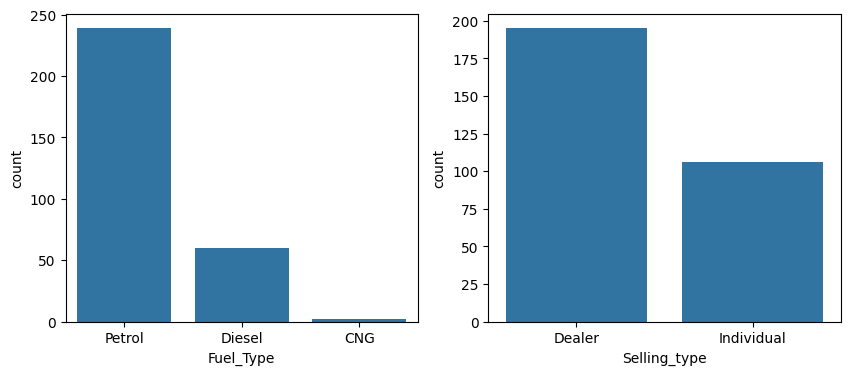

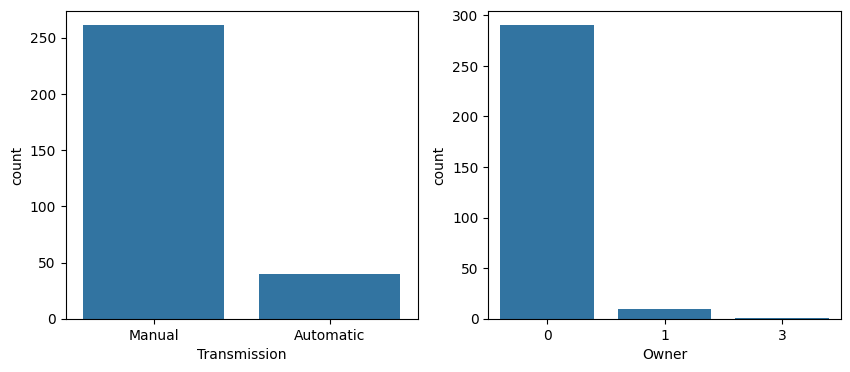

In [7]:
cat_cols = ['Fuel_Type','Selling_type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])

    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    plt.show()

In [8]:
numerical_data = data.select_dtypes(include=['int', 'float'])

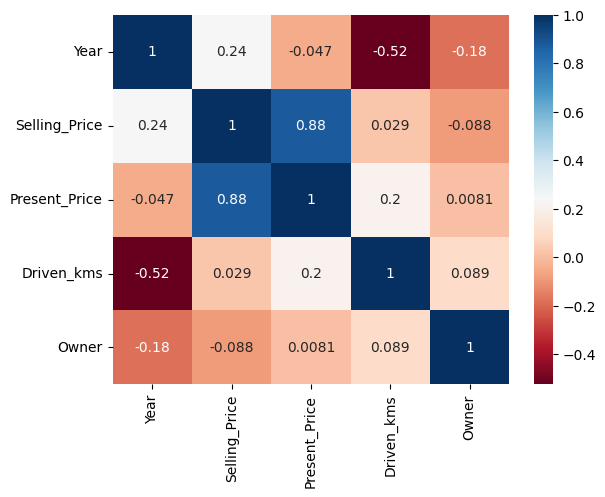

In [9]:
sns.heatmap(numerical_data.corr(), annot=True, cmap="RdBu")
plt.show()

In [10]:
data.drop(labels='Car_Name',axis= 1, inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])


In [12]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [13]:
y = data['Selling_Price']
x = data.drop('Selling_Price',axis=1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred

array([ 6.4 ,  2.75,  0.4 ,  2.9 ,  1.1 ,  4.4 ,  0.8 ,  2.9 ,  8.5 ,
        0.6 ,  9.1 ,  3.5 ,  5.25,  4.  ,  0.12,  0.5 ,  7.5 ,  5.95,
        4.8 ,  7.5 ,  4.8 ,  3.  ,  4.  ,  6.  ,  4.  ,  3.1 ,  3.  ,
        0.75,  0.25,  0.31,  0.35,  0.25,  5.25, 23.5 , 23.  ,  4.  ,
        3.5 ,  1.05,  0.15,  3.5 , 10.9 , 12.5 ,  0.15,  4.  ,  4.75,
        5.3 ,  6.  ,  8.25,  7.5 ,  1.11,  4.5 ,  0.45,  2.7 ,  4.75,
        1.15,  0.1 , 23.5 ,  0.4 ,  6.4 ,  6.1 ,  0.35])

In [19]:
model.score(x_test,y_test)

0.9515109853654123

In [20]:
for x, y in zip(x_test, y_pred):
    print("X_test:", x, "Prediction:", y)

X_test: [ 0.79741725  0.09516555 -0.53150987  0.50050075 -0.73379939 -2.69738059
 -0.16012815] Prediction: 6.4
X_test: [-0.21696512 -0.34734179 -0.17485828  0.50050075 -0.73379939  0.37073003
 -0.16012815] Prediction: 2.75
X_test: [-0.89322003 -0.77555275 -0.74775421  0.50050075  1.36277029  0.37073003
 -0.16012815] Prediction: 0.4
X_test: [ 0.79741725 -0.36663057 -0.53291824  0.50050075 -0.73379939  0.37073003
 -0.16012815] Prediction: 2.9
X_test: [-0.21696512 -0.6990784  -0.53291824  0.50050075  1.36277029  0.37073003
 -0.16012815] Prediction: 1.1
X_test: [ 1.1355447  -0.06027933 -0.59309618  0.50050075 -0.73379939  0.37073003
 -0.16012815] Prediction: 4.4
X_test: [ 1.1355447  -0.76148329 -0.80743087  0.50050075  1.36277029  0.37073003
 -0.16012815] Prediction: 0.8
X_test: [-0.89322003 -0.22139739  0.13546035  0.50050075 -0.73379939  0.37073003
 -0.16012815] Prediction: 2.9
X_test: [ 0.45928979  0.67382901 -0.07937563  0.50050075 -0.73379939  0.37073003
 -0.16012815] Prediction: 8.5


In [21]:
# Evaluating the model

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 1.0519295081967215
Root Mean Squared Error: 1.0256361480548164
R-squared Score: 0.9515109853654123
